In [138]:
import numpy as np
import matplotlib.pyplot as plt

# PCA Notion

- Idea is to find a subspace/hyperplane to project our data onto

- Choose the hyperplane that preserves the most variance in the data


- We can also think of this as finding the most efficient basis for representing our data, and then choosing only the most important dimensions

(Figures from Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow)

<img src="PCA1.png" style="width:600px;"/>

<img src="PCA2.png" style="width:500px;"/>

<img src="PCA3.png" style="width:700px;"/>


vs:

<img src="PCA4.png" style="width:600px;"/>

## Principal Components

- We can see the axis that explains most of the variance visually on some toy data:

In [139]:
#First just get a normally distributed point cloud at the origin:
from scipy.stats import multivariate_normal

#Number of samples:
N = 500

#Covariance matrix:
cov = [[1, 0], [0, 1]]

#Set our means:
means = [0, 0]

#And get our sample, size N:
y = multivariate_normal(cov = cov, mean = means)
X = y.rvs(size = N)

In [140]:
#Get stretched version:
A = np.array([[3, 1],[1, 1]])
#A = np.array([[1, 0], [0,1]])

#And apply:
X_new = np.dot(A, X.T).T

(-10.0, 10.0)

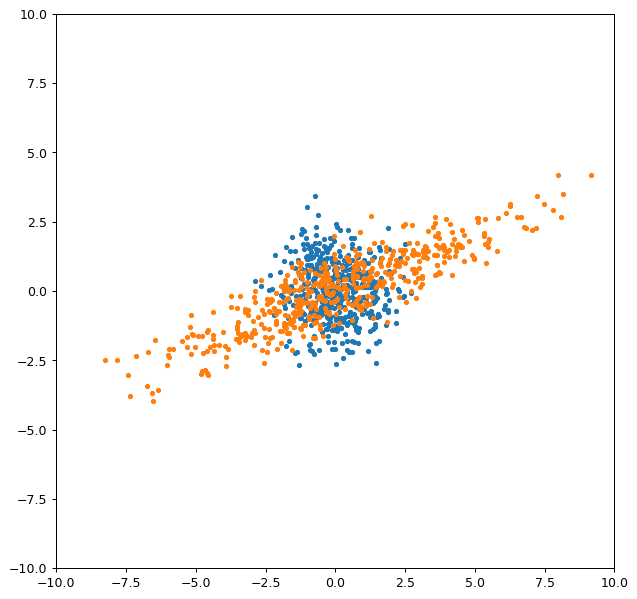

In [141]:
#Plot:
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=90)

ax1.scatter(X[:,0], X[:,1], s=10);
ax1.scatter(X_new[:,0], X_new[:,1], s=10);

ax1.set_xlim([-10, 10])
ax1.set_ylim([-10, 10])

In [142]:
## SVD of the Data:
u, vals, vecs = np.linalg.svd(X_new)

In [143]:
#Singular values?
vals = vals / vals[0]
vals

array([1.        , 0.18798318])

In [144]:
#Vectors?
vecs

array([[-0.92458006, -0.38098782],
       [-0.38098782,  0.92458006]])

In [145]:
v1 = vecs[0,:]
v2 = vecs[1,:]

(-10.0, 10.0)

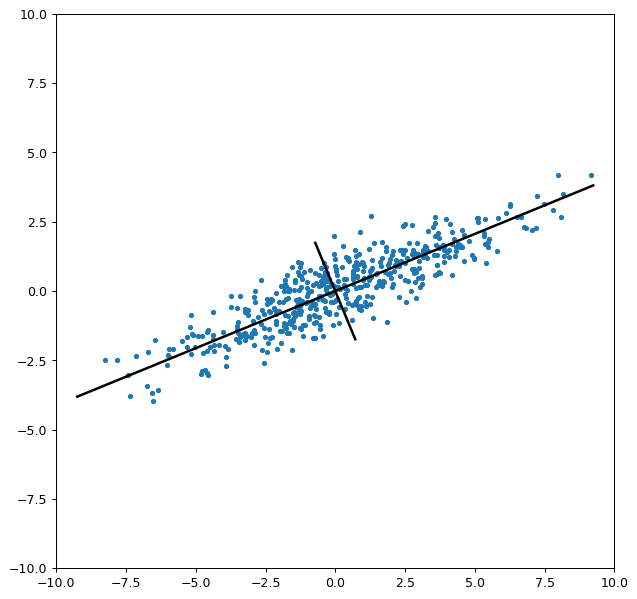

In [146]:
#Add in to plot:
####
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=90)

#ax1.scatter(X[:,0], X[:,1], s=10);
ax1.scatter(X_new[:,0], X_new[:,1], s=10);

f=10
ax1.plot([v1[0]*(-f)*vals[0], v1[0]*f*vals[0]],
         [v1[1]*(-f)*vals[0], v1[1]*f*vals[0]], color='black', linewidth=2)

ax1.plot([v2[0]*(-f)*vals[1], v2[0]*f*vals[1]],
         [v2[1]*(-f)*vals[1], v2[1]*f*vals[1]], color='black', linewidth=2)

ax1.set_xlim([-10, 10])
ax1.set_ylim([-10, 10])

In [147]:
## Project to first principal component
###########

X_projected = X_new.dot(v1)

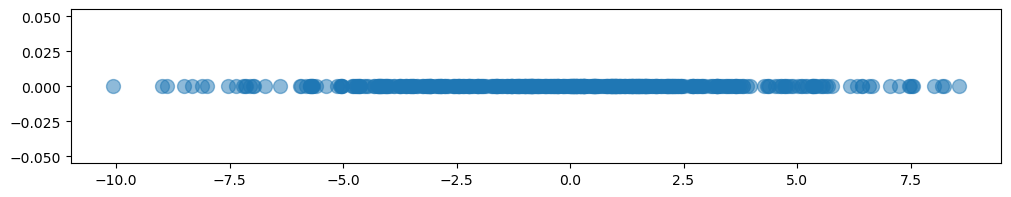

In [148]:
#And plot projected data::
####
fig, ax1 = plt.subplots(1,1, figsize=(12, 2))

ax1.plot(X_projected, np.zeros(N), '.', markersize=20, alpha=.5);

In [149]:
## And invert our projection:
###
X_recovered = X_projected.reshape(-1,1).dot(v1.reshape(-1,1).T)

(-10.0, 10.0)

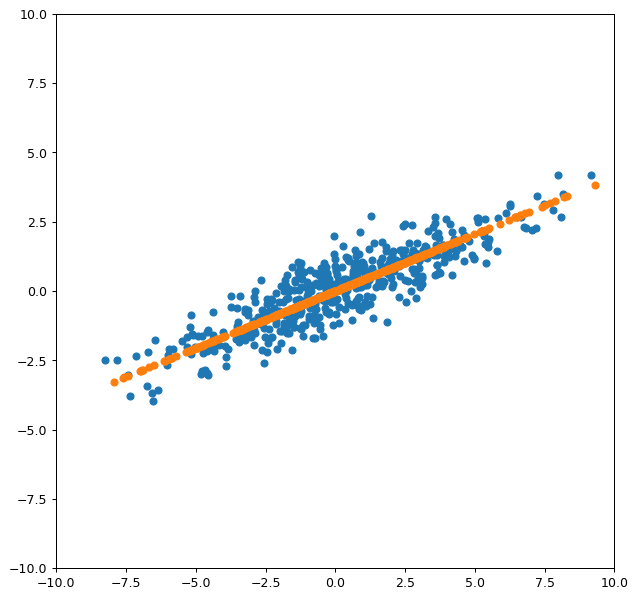

In [150]:
#And plot with original data::
####
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=90)

ax1.scatter(X_new[:,0], X_new[:,1], s=30);
ax1.scatter(X_recovered[:,0], X_recovered[:,1], s=30);

if (0):
    f=10
    ax1.plot([v1[0]*(-f)*vals[0], v1[0]*f*vals[0]],
             [v1[1]*(-f)*vals[0], v1[1]*f*vals[0]], color='black', linewidth=2)

    ax1.plot([v2[0]*(-f)*vals[1], v2[0]*f*vals[1]],
             [v2[1]*(-f)*vals[1], v2[1]*f*vals[1]], color='black', linewidth=2)

ax1.set_xlim([-10, 10])
ax1.set_ylim([-10, 10])

In [151]:
### Let's use scikit-learn:
### Note: sklearn automatically centers your data for you

In [152]:
from sklearn.decomposition import PCA

In [153]:
pca = PCA(n_components = 1)

#Reduce the dimensions with PCA:
X_reduced = pca.fit_transform(X_new)

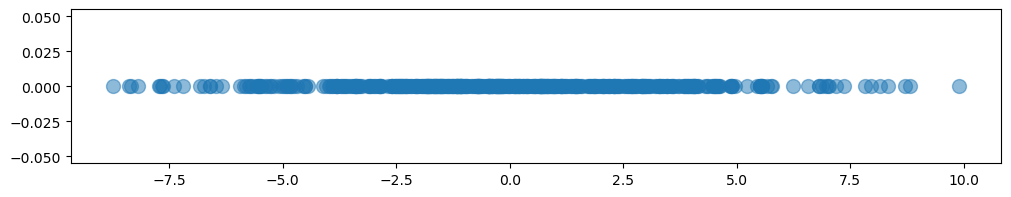

In [154]:
#And plot again:
####
fig, ax1 = plt.subplots(1,1, figsize=(12, 2))

ax1.plot(X_reduced, np.zeros(N), '.', markersize=20, alpha=.5);


(-10.0, 10.0)

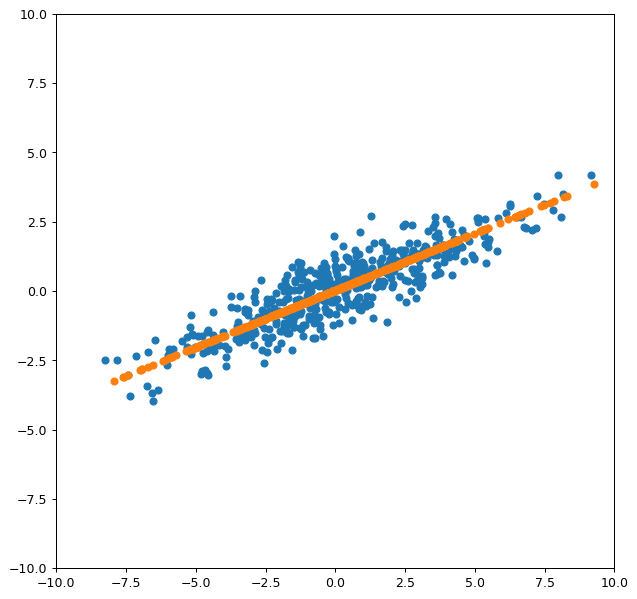

In [155]:
#Invert and plot:
######
X_recovered = pca.inverse_transform(X_reduced)

#Add in to plot:
####
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=90)

ax1.scatter(X_new[:,0], X_new[:,1], s=30);
ax1.scatter(X_recovered[:,0], X_recovered[:,1], s=30);

ax1.set_xlim([-10, 10])
ax1.set_ylim([-10, 10])

In [156]:
## Explained variance?
#######

#Do all dimensions
pca = PCA(n_components = 2)
pca.fit(X_new)

#And explained variance?
pca.explained_variance_ratio_

array([0.96584297, 0.03415703])

## PCA on MNIST Numbers


In [275]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

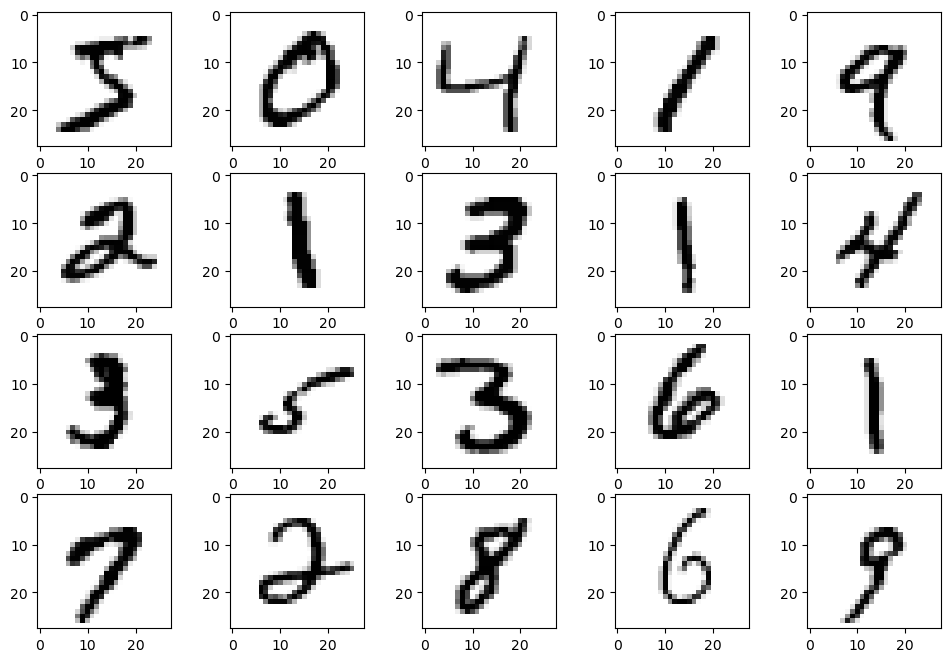

In [276]:
#Plot the first few train images:
#######

fig1, ax1 = plt.subplots(4, 5, figsize=(12,8))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(20):

    im = ax1[i].imshow(train_images[i], cmap='gray_r')
    #fig1.colorbar(im,  ax=ax1[i], orientation='vertical')
    

In [277]:
#Let's reshape to n by p:
X_train = train_images.reshape(-1,28*28)
X_train.shape

(60000, 784)

In [160]:
#And do PCA:
##########

pca = PCA(n_components=30)
X_reduced = pca.fit_transform(X_train)

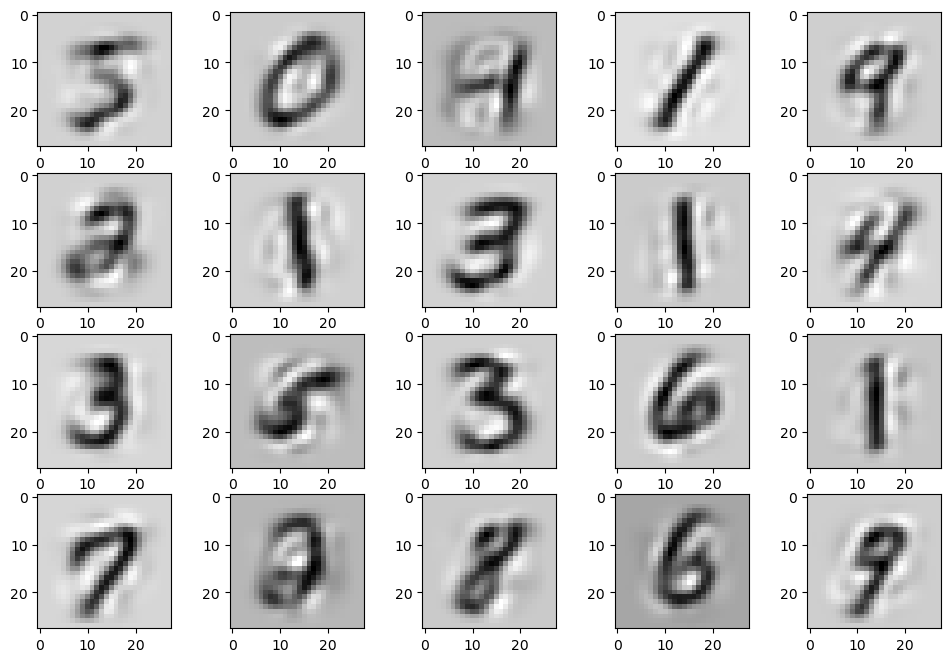

In [161]:
#Let's plot some compressed numbers:
######

fig1, ax1 = plt.subplots(4, 5, figsize=(12,8))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(20):

    #Need to put back into original space
    X_recovered = pca.inverse_transform(X_reduced[i,:])
    
    im = ax1[i].imshow(X_recovered.reshape(28,28), cmap='gray_r')
    #fig1.colorbar(im,  ax=ax1[i], orientation='vertical')

In [37]:
#Our eigennumbers?
pca.components_.shape

(30, 784)

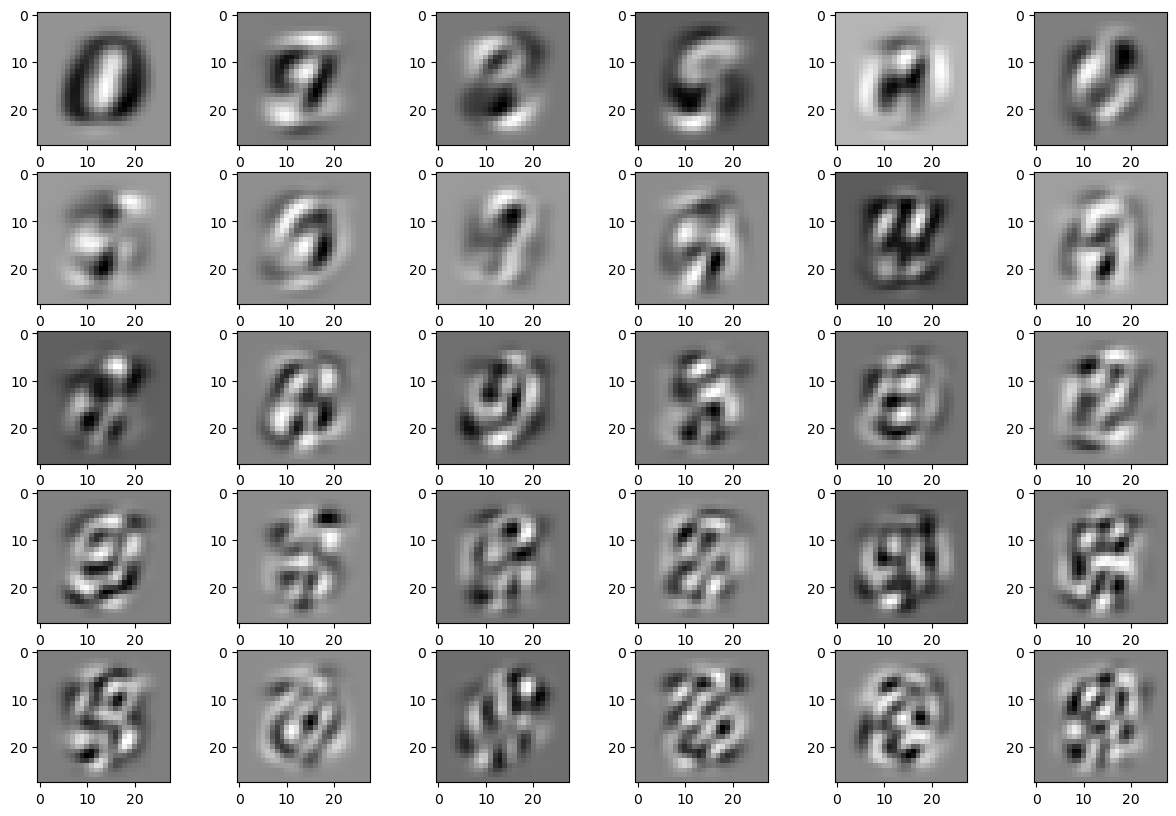

In [38]:
#Plot some of the eigen-numbers:
######
fig1, ax1 = plt.subplots(5, 6, figsize=(15,10))
ax1 = ax1.flatten()

#Plot:
for i in range(30):

    eigen_number = pca.components_[i, :].reshape(28,28)
    
    im = ax1[i].imshow(eigen_number, cmap='gray_r')
    

In [278]:
#What if we just have 2 components?
##########

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

In [279]:
X_reduced

array([[ 123.93169204, -312.67043109],
       [1011.71648624, -294.87549391],
       [ -51.84712911,  392.19702747],
       ...,
       [-178.05434379,  160.07734627],
       [ 130.60607091,   -5.58572053],
       [-173.43618383,  -24.71694553]])

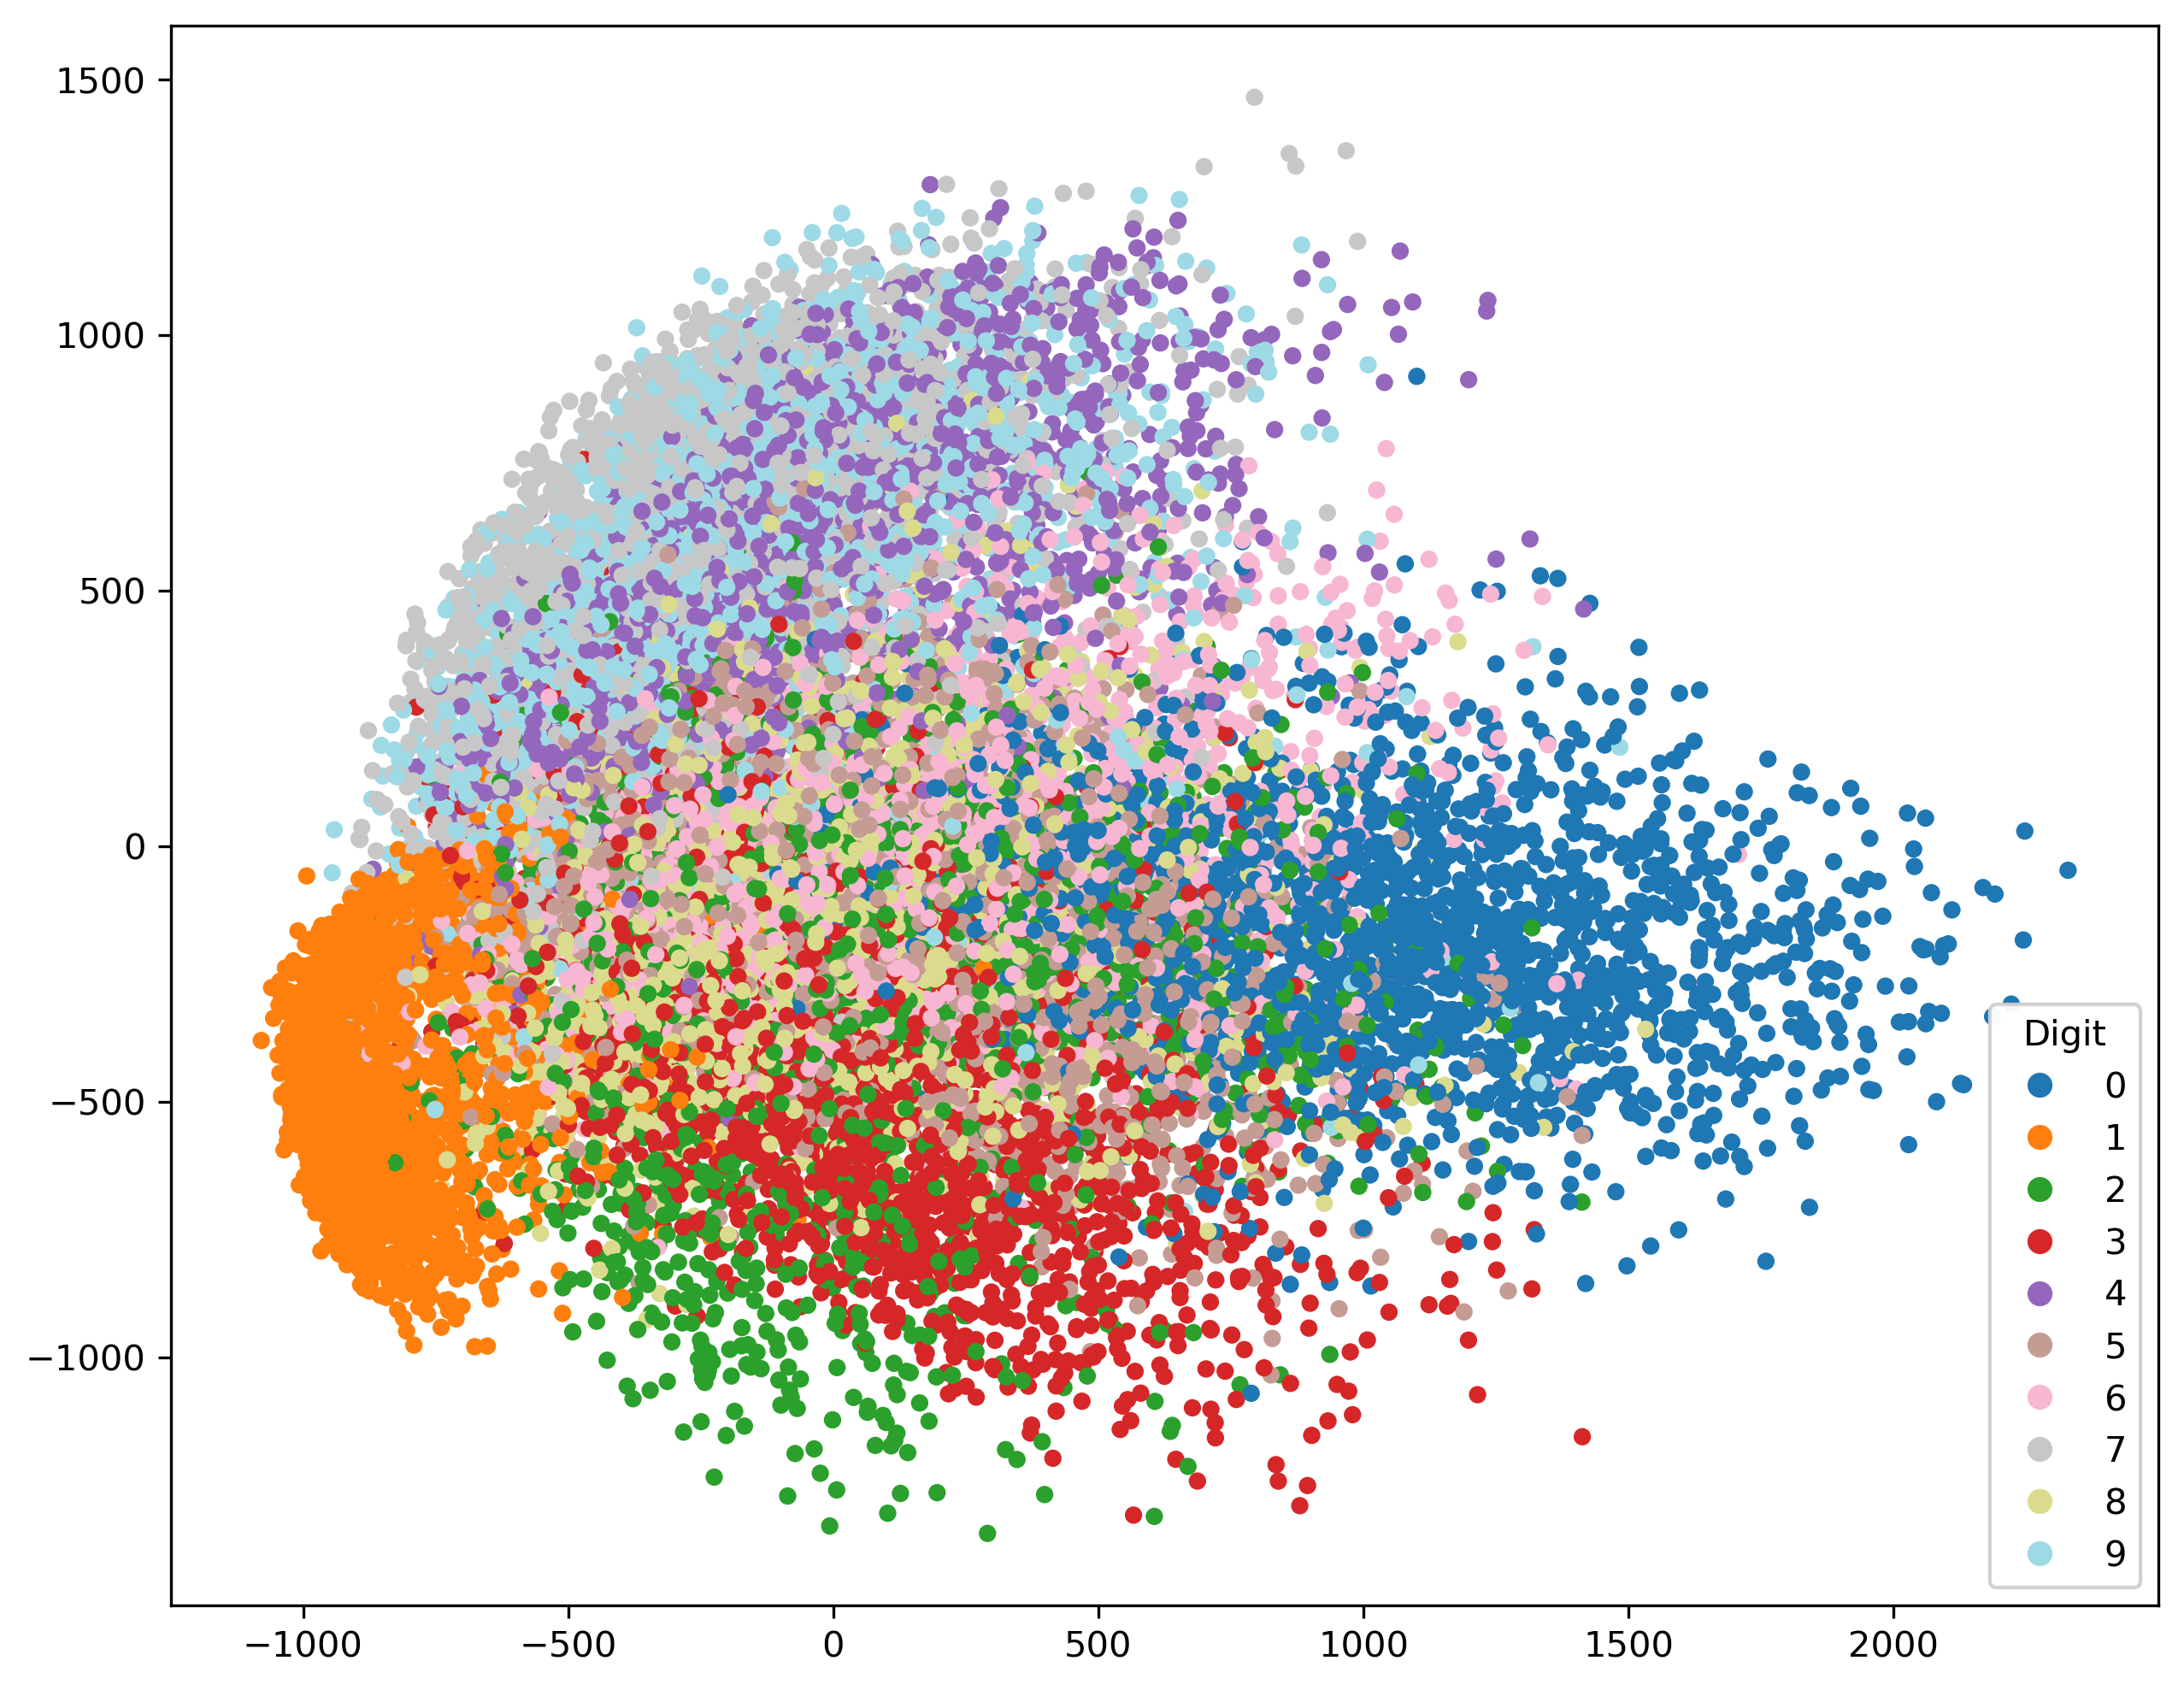

In [280]:
#Let's plot points in PC space:
######

fig1, ax1 = plt.subplots(1, 1, figsize=(10,8), dpi=300)

scatter = ax1.scatter(X_reduced[:20000,0], X_reduced[:20000,1], c=train_labels[:20000],
                      s=15, cmap='tab20')

legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower right", title="Digit")
ax1.add_artist(legend1)

#### How about just 1 vs. 0?

- Let's filter down our data, do PCA, and visualize

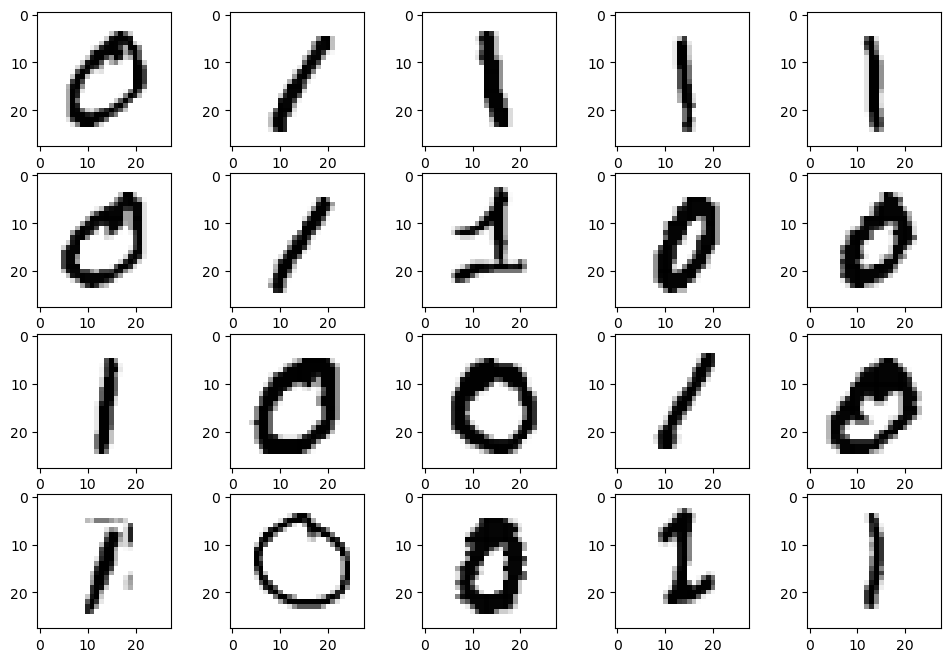

In [46]:
#Get just 0s and 1s:
images_01 = train_images[np.where(np.isin(train_labels, [0,1])), :, :].squeeze()
labels_01 = train_labels[np.where(np.isin(train_labels, [0,1]))]

test_images_01 = test_images[np.where(np.isin(test_labels, [0,1])), :, :].squeeze()
test_labels_01 = test_labels[np.where(np.isin(test_labels, [0,1]))]

#Confirm it's correct:
fig1, ax1 = plt.subplots(4, 5, figsize=(12,8))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(20):


    im = ax1[i].imshow(images_01[i,:,:].reshape(28,28), cmap='gray_r')

In [86]:
#Do PCA: Just use 2 for final
pca = PCA(n_components=2)
reduced_01 = pca.fit_transform(images_01.reshape(-1,784))

test_reduced_01 = pca.transform(test_images_01.reshape(-1,784))

IndexError: index 2 is out of bounds for axis 0 with size 2

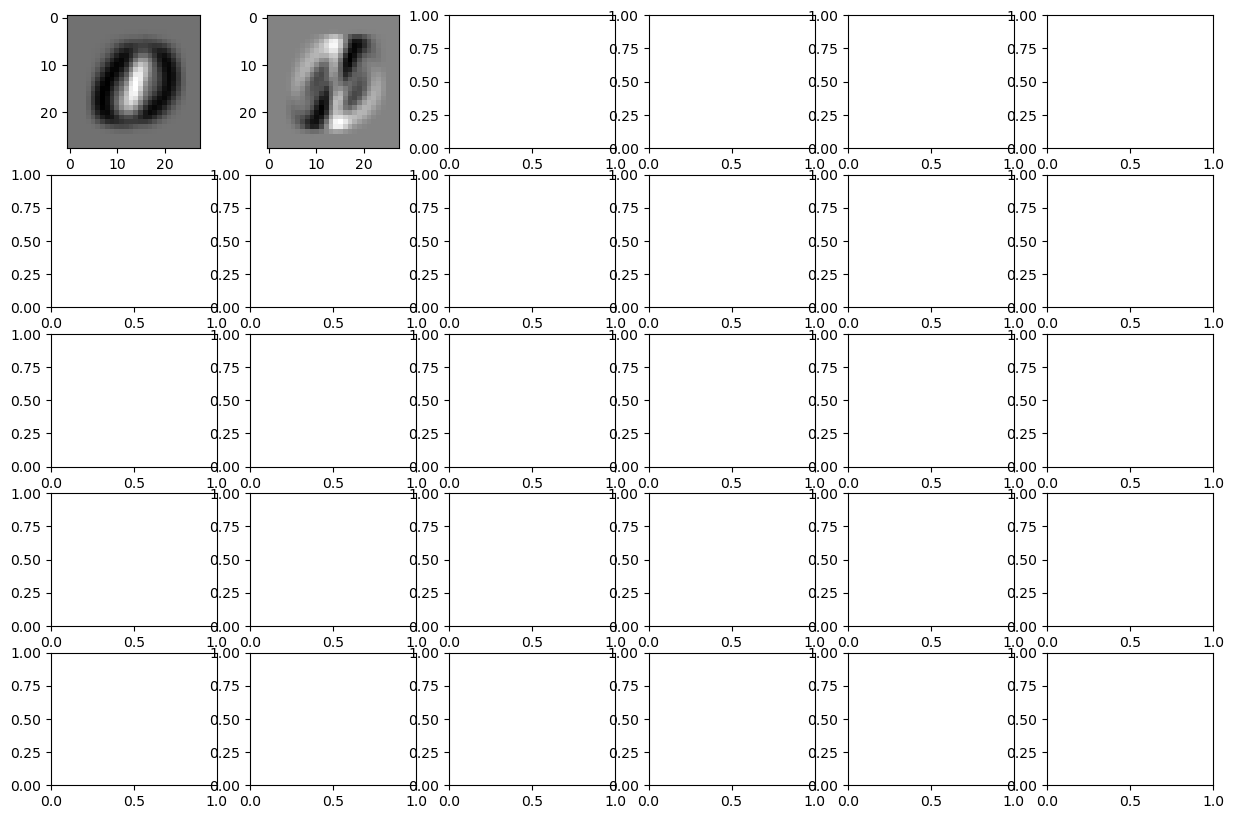

In [87]:
#And now our eigennumbers:
fig1, ax1 = plt.subplots(5, 6, figsize=(15,10))
ax1 = ax1.flatten()

#Plot:
for i in range(30):

    eigen_number = pca.components_[i, :].reshape(28,28)
    
    im = ax1[i].imshow(eigen_number, cmap='gray_r')
    

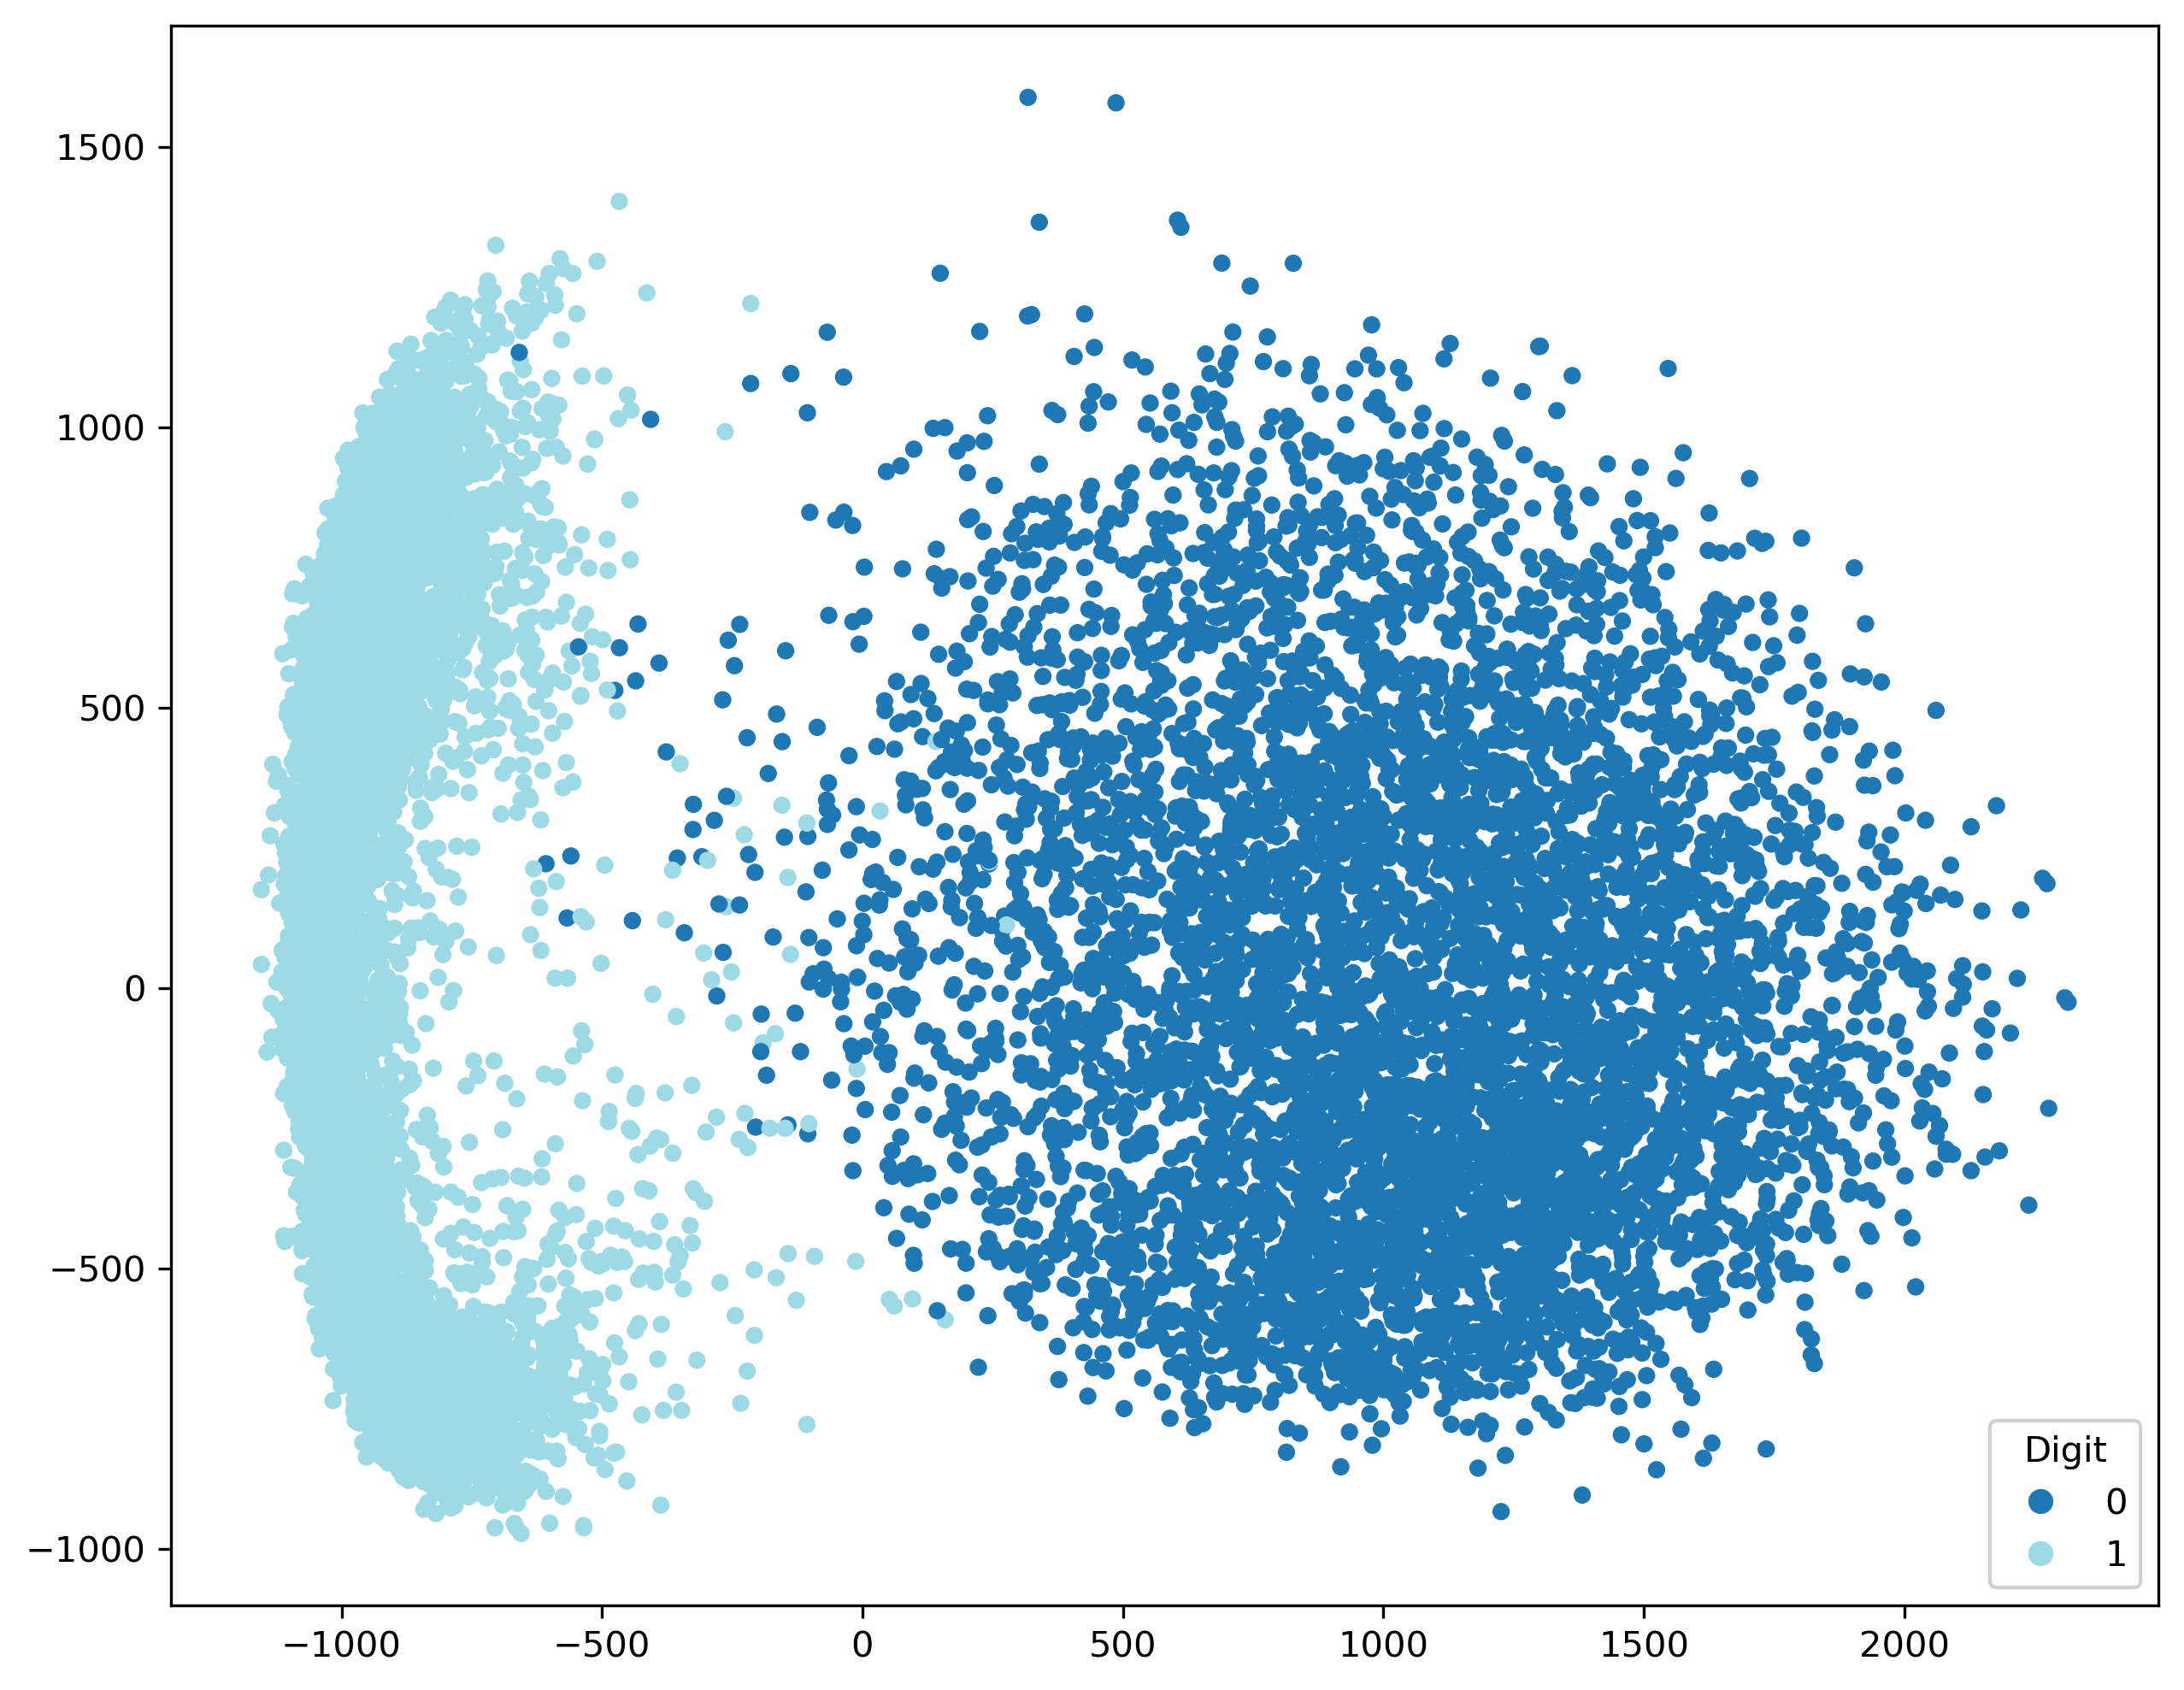

In [88]:
#Let's plot points in PC space:
######

fig1, ax1 = plt.subplots(1, 1, figsize=(10,8), dpi=300)

scatter = ax1.scatter(reduced_01[:20000,0], reduced_01[:20000,1], c=labels_01[:20000],
                      s=15, cmap='tab20')

legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower right", title="Digit")
ax1.add_artist(legend1)

### Scree Plot/Cumulative Variance

- Plot amount of variance explained by each principal component = Scree Plot
- Plot cumulative amount of variance explained as function of number of principal components

In [162]:
### Remake our PCA:
pca = PCA(n_components=784)

#And fit:
pca.fit(X_train)


PCA(n_components=784)

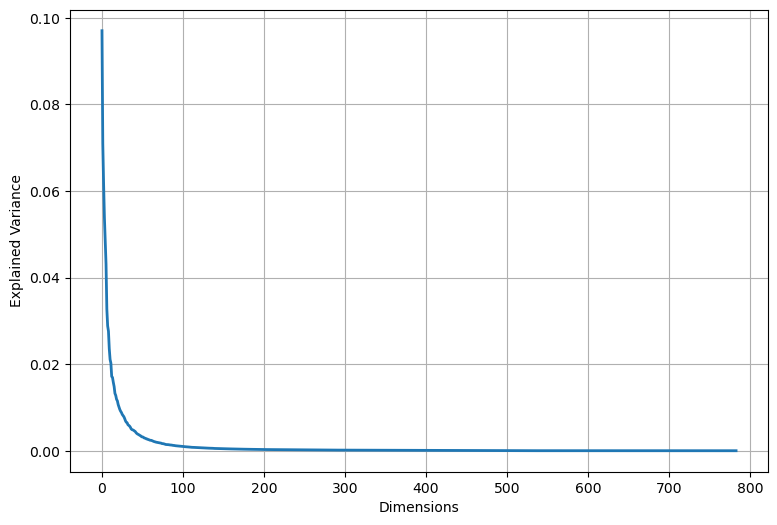

In [163]:
#Scree Plot:
########
fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))

ax1.plot(pca.explained_variance_ratio_, linewidth=2)

ax1.grid(True)
ax1.set_xlabel('Dimensions')
ax1.set_ylabel('Explained Variance');


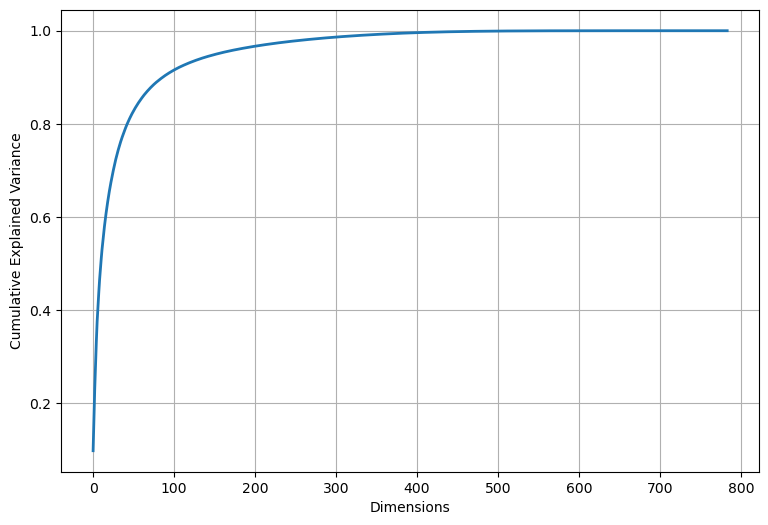

In [164]:
#Plot the cumulative sum of variance explained:
#######
fig1, ax1 = plt.subplots(1, 1, figsize=(9,6))

ax1.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)

ax1.grid(True)
ax1.set_xlabel('Dimensions')
ax1.set_ylabel('Cumulative Explained Variance');


## Train a Classifier

- Let's use a random forest

- Train on the raw data and reduced dimension data

In [281]:
#Get and train random forest classifier:
#Takes a minute to train
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)


clf.fit(train_images.reshape(-1, 784), train_labels)


RandomForestClassifier(random_state=42)

In [59]:
#How'd we do on the training data? Get our predictions
y_pred = clf.predict(train_images.reshape(-1, 784))

In [60]:
from sklearn.metrics import confusion_matrix

#Perfect performance...
confusion_matrix(train_labels, y_pred)

array([[5923,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6742,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5958,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6131,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5842,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5421,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5918,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6265,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5851,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5949]],
      dtype=int64)

In [61]:
#And on the testing data:
y_pred = clf.predict(test_images.reshape(-1, 784))


In [62]:
confusion_matrix(test_labels, y_pred)

array([[ 971,    0,    0,    0,    0,    2,    3,    1,    3,    0],
       [   0, 1127,    2,    2,    0,    1,    2,    0,    1,    0],
       [   6,    0, 1002,    5,    3,    0,    3,    8,    5,    0],
       [   1,    0,    9,  972,    0,    9,    0,    9,    8,    2],
       [   1,    0,    0,    0,  955,    0,    5,    1,    4,   16],
       [   5,    1,    1,    9,    2,  860,    5,    2,    5,    2],
       [   7,    3,    0,    0,    3,    3,  937,    0,    5,    0],
       [   1,    4,   20,    2,    0,    0,    0,  990,    2,    9],
       [   4,    0,    6,    7,    5,    5,    5,    4,  930,    8],
       [   7,    6,    2,   12,   12,    1,    0,    4,    4,  961]],
      dtype=int64)

In [63]:
##Overall accuracy?
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred, normalize=True)


0.9705

In [287]:
### Now try it on reduced dimension:
# Reshape our data and reduce dimension:

X_train = train_images.reshape(-1,28*28)
X_test = test_images.reshape(-1,28*28)

#Do PCA:
pca = PCA(n_components=50)

X_train_reduced = pca.fit_transform(X_train)


X_test_reduced = pca.transform(X_test)

In [288]:
##Classifier training
##Takes another minute...
clf_reduced = RandomForestClassifier(random_state=42)

clf_reduced.fit(X_train_reduced, train_labels)


RandomForestClassifier(random_state=42)

In [289]:
#Performance on the training data? Perfect once again
y_pred = clf_reduced.predict(X_train_reduced)

accuracy_score(train_labels, y_pred, normalize=True)

1.0

In [290]:
#And on the testing data:
y_pred = clf_reduced.predict(X_test_reduced)

In [291]:
##Overall accuracy?
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred, normalize=True)

0.9535

## Classify the reduced dimension 0/1 Data?

- From above, we just represent 0 vs. 1 using 2 principal components
- Let's classify using either all or 2 principal components

In [70]:
##Classifier on all dimensions:
clf_0v1 = RandomForestClassifier(random_state=42)

#images_01 is train images
clf_0v1.fit(images_01.reshape(-1,28*28), labels_01)


RandomForestClassifier(random_state=42)

In [76]:
#Performance on testing 1s vs. 0s
y_pred = clf_0v1.predict(test_images_01.reshape(-1,28*28))

accuracy_score(test_labels_01, y_pred, normalize=True)

0.9990543735224586

In [77]:
#Use False in normalize above to see number classified correctly
#len(test_labels_01)


In [89]:
##Classifier on reduced data?
clf_reduced = RandomForestClassifier(random_state=42)

clf_reduced.fit(reduced_01, labels_01)


RandomForestClassifier(random_state=42)

In [92]:
#Nearly as good!
y_pred = clf_reduced.predict(test_reduced_01)

accuracy_score(test_labels_01, y_pred, normalize=True)

0.9976359338061466

## t-SNE for Visualization

- "t-distributed Stochastic Neighbor Embedding"
- Iterative, stochastic, local method
- PCA attempts to minimize global variance, doesn't see local non-linear structures well
- "converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data"
- Useful for visualizing data, see if classes are separable, how they relate in feature space
- Less useful for classical train/test workflow (can kinda hack it in, but not widely used as far as I know)

In [176]:
## Limit to 5000 samples for speed:
    
X_sample, y_sample = train_images[:5000], train_labels[:5000]

In [177]:
from sklearn.manifold import TSNE

#Initialize our t-SNE model:
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)

In [178]:
%%time

## Fit model
X_reduced = tsne.fit_transform(X_sample.reshape(-1, 28*28))

CPU times: total: 1min 35s
Wall time: 12.2 s


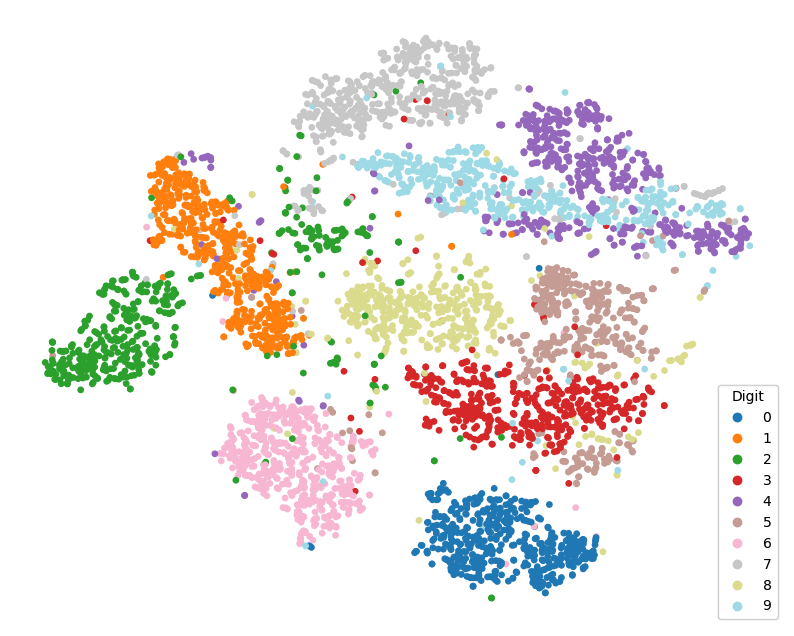

In [185]:
#And plot results:
######

fig1, ax1 = plt.subplots(1, 1, figsize=(10,8)) #, dpi=300)

scatter = ax1.scatter(X_reduced[:,0], X_reduced[:,1], c=y_sample,
                      s=15, cmap='tab20')

legend1 = ax1.legend(*scatter.legend_elements(),
                    loc="lower right", title="Digit")
ax1.add_artist(legend1)
ax1.set_axis_off()

In [189]:
from matplotlib import cm
my_cmap = cm.get_cmap('tab20', 10)

C:\Users\steff\AppData\Local\Temp\ipykernel_26888\1749532173.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('tab20', 10)


In [235]:
#Add annotation: Digits, enforce minimum distance
########
def plot_digits(X_reduced, X_sample, y_sample, do_images = True):
    from matplotlib.offsetbox import AnnotationBbox, OffsetImage

    #from sklearn.preprocessing import MinMaxScaler
    #from matplotlib.offsetbox import AnnotationBbox, OffsetImage

    fig1, ax1 = plt.subplots(1, 1, figsize=(16,14)) #, dpi=300)

    scatter = ax1.scatter(X_reduced[:,0], X_reduced[:,1], c=y_sample,
                          s=15, cmap='tab20') #, alpha=.5)

    ax1.set_axis_off()

    neighbors = np.array([[0., 0.]])
    min_distance = 10

    for index, image_coord in enumerate(X_reduced):

        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]

            if (not do_images):
                ax1.text(image_coord[0], image_coord[1], str(y_sample[index]),
                         color=np.array(my_cmap(float(y_sample[index]) / 9)),
                         fontweight='bold', fontsize=14,
                         bbox={'facecolor':'white','alpha':.9,'edgecolor':'black','pad':2},
                         ha='center', va='center')
            else:
                image = X_sample[index]
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord, pad=0, zorder=1)
                ax1.add_artist(imagebox)


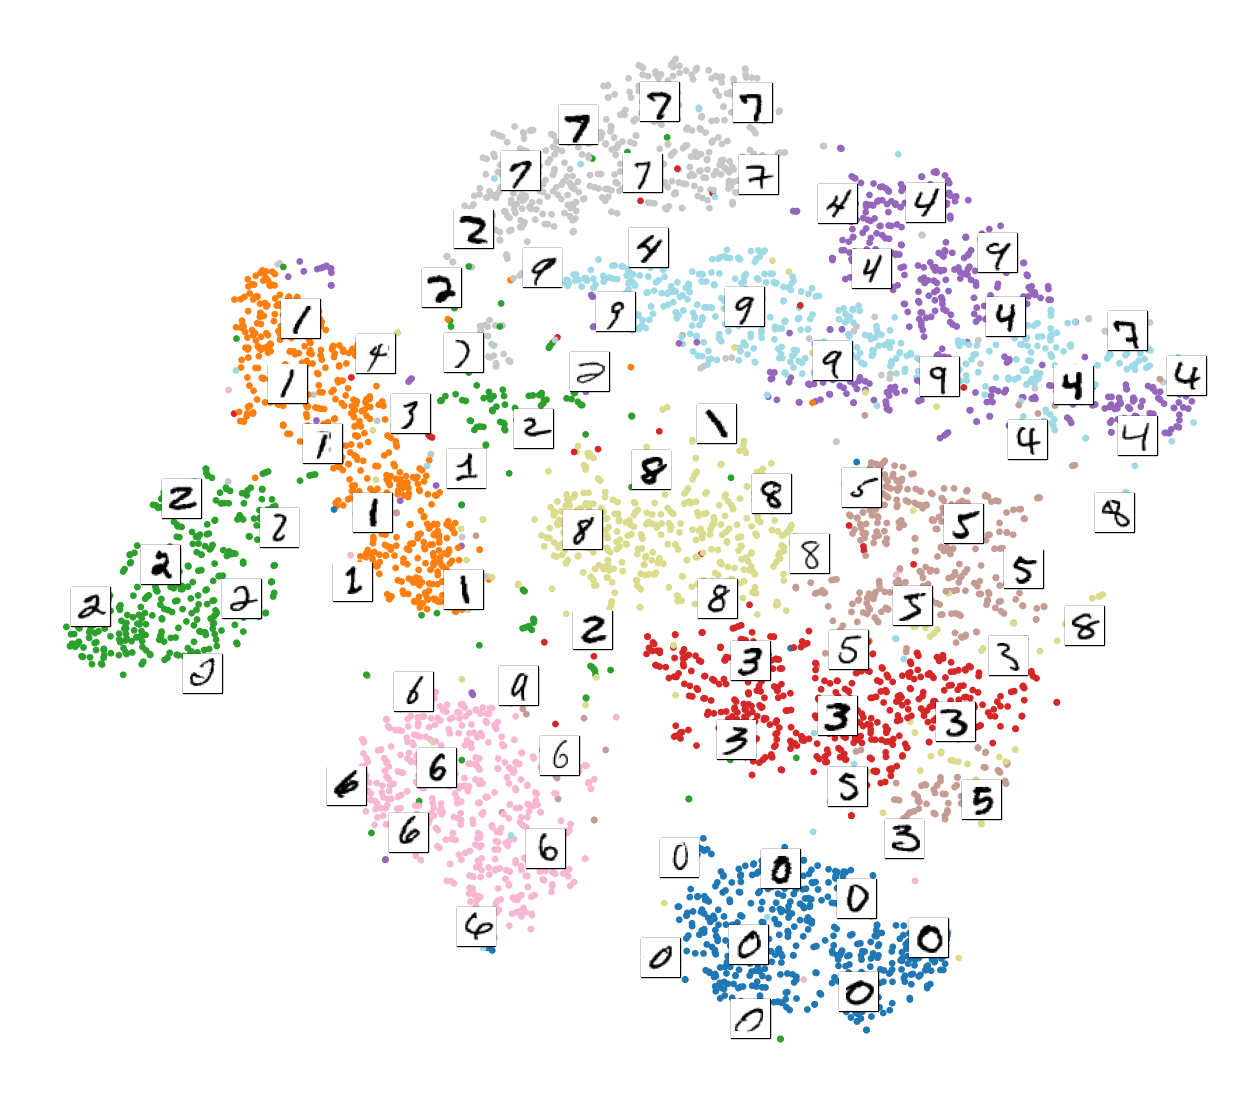

In [236]:
plot_digits(X_reduced, X_sample, y_sample, do_images = True)

## t-SNE on 0 vs. 1

In [238]:
## Limit to 10000 samples for speed:
    
X_sample_01, y_sample_01 = images_01[:10000], labels_01[:10000]

In [239]:
#Initialize our t-SNE model:
tsne_01 = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)

In [240]:
%%time

## Fit model
X_reduced_01 = tsne.fit_transform(X_sample_01.reshape(-1, 28*28))

CPU times: total: 3min 20s
Wall time: 25.1 s


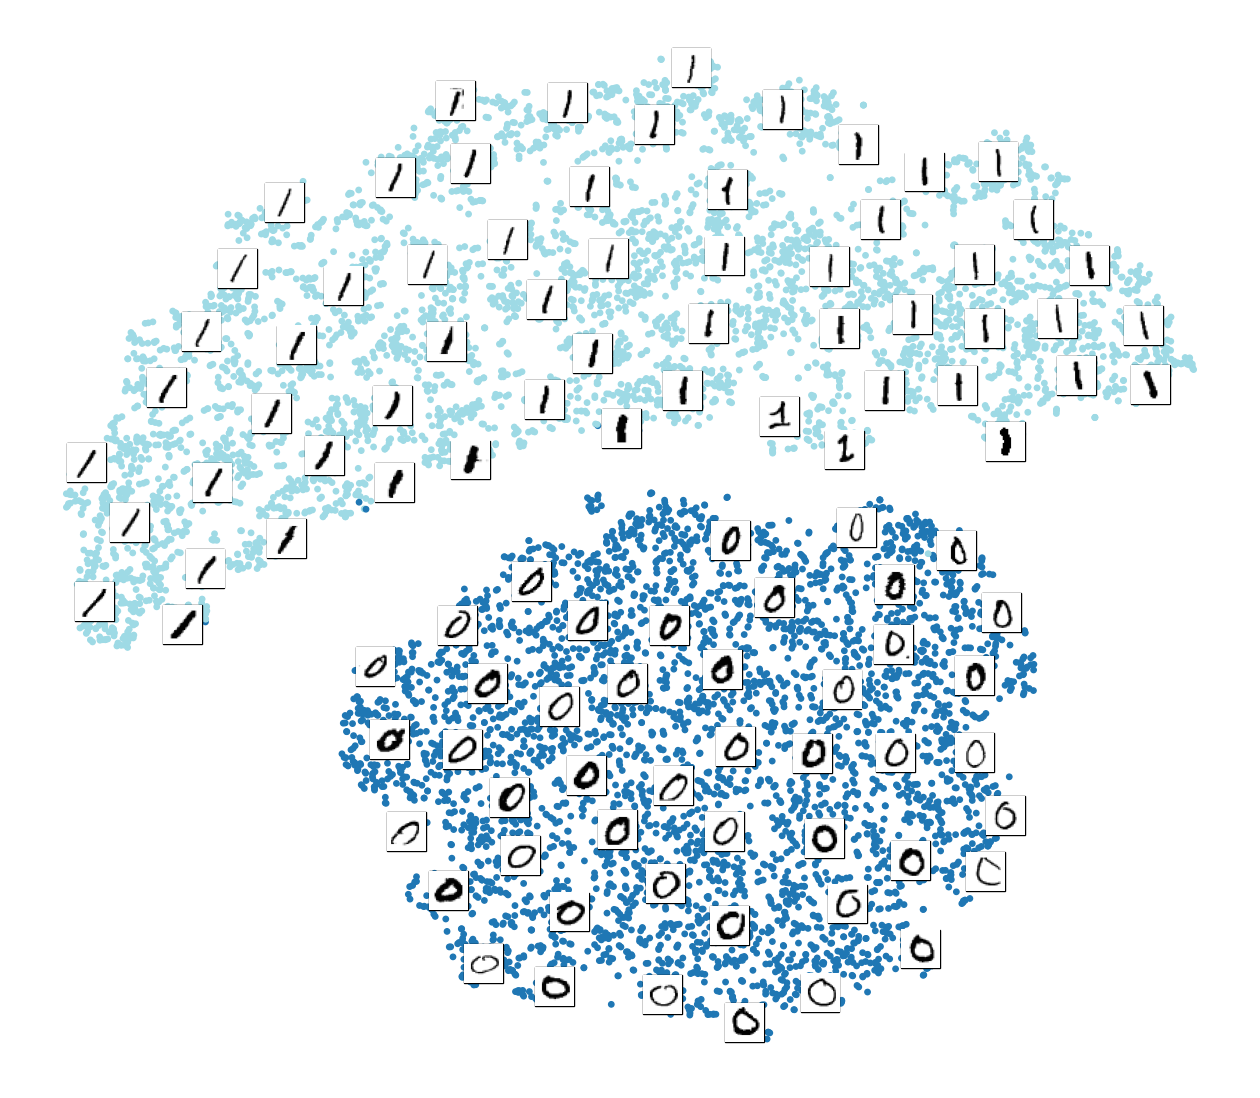

In [241]:
plot_digits(X_reduced_01, X_sample_01, y_sample_01, do_images = True)

## Classifier with Dimensionality Reduction Using t-SNE?

- ***How to use on Out-of-sample data???***
- No transform method: tSNE does not learn some hyperplane to project onto!
- Could try the following hack instead...


In [318]:
## Limit to 5000 samples for speed:
X_train, y_train = train_images[:5000], train_labels[:5000]

#SMALL test set
X_test, y_test = test_images[:100], test_labels[:100]

In [312]:
%%time

from sklearn.manifold import TSNE

#Initialize our t-SNE model:
tsne = TSNE(n_components=3, init="random", learning_rate="auto",
            random_state=42)

## Fit tSNE and transform the TRAINING data
X_train_reduced = tsne.fit_transform(X_train.reshape(-1, 28*28))

CPU times: total: 3min 49s
Wall time: 29.1 s


In [313]:
##Now train the classifier:
clf_tsne = RandomForestClassifier(random_state=42)

clf_tsne.fit(X_train_reduced, y_train)


#We do perfectly on training
y_pred = clf_tsne.predict(X_train_reduced)

accuracy_score(y_train, y_pred, normalize=True)

1.0

In [315]:
%%time

## Fit/Transform on training data + testing data:
X_train_test_reduced = tsne.fit_transform(np.r_[X_train, X_test].reshape(-1, 28*28))

CPU times: total: 3min 53s
Wall time: 29.6 s


In [316]:
X_test_reduced = X_train_test_reduced[5000:,]

In [317]:
#And predict? It's OKAY
y_pred = clf_tsne.predict(X_test_reduced)

accuracy_score(y_test, y_pred, normalize=True)


0.93

## K-Means as Dimensionality Reduction

- We can also use clustering for dimensionality reduction

- Let's classify our numbers using clustering...

In [93]:
#To speed things up, just use a subset of the training data
######

train_small = train_images[:1000,:,:]
train_labels_small = train_labels[:1000]

In [104]:
from sklearn.cluster import KMeans

k = 50
kmeans = KMeans(n_clusters=k)
kmeans.fit(train_small.reshape(-1, 784), train_labels_small)

C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=50)

In [105]:
#Now train with the kmeans labels:
######

##CLassifier:
clf_k = RandomForestClassifier(random_state=42)

clf_k.fit(kmeans.labels_.reshape(-1,1), train_labels_small)


RandomForestClassifier(random_state=42)

In [106]:
#Now predict on the testing data:
######

#Assign the testing data to clusters:
###
test_cluster = kmeans.predict(test_images.reshape(-1,784))

#y_pred = clf_k.predict(kmeans.labels_.reshape(-1,1))
y_pred = clf_k.predict(test_cluster.reshape(-1,1))

In [107]:
#Not bad!
accuracy_score(test_labels, y_pred, normalize=True)

0.7467

## PCA + K-Means?

Start with PCA, then cluster

In [119]:
### Remake our PCA:
pca = PCA(n_components=2)

#And fit:
X_reduced = pca.fit_transform(X_train)


In [124]:
#Now, clustering on the reduced data...

k = 10
kmeans_reduced = KMeans(n_clusters=k)
km = kmeans_reduced.fit(X_reduced, train_labels)


C:\Users\steff\Anaconda3\envs\ML_environment\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


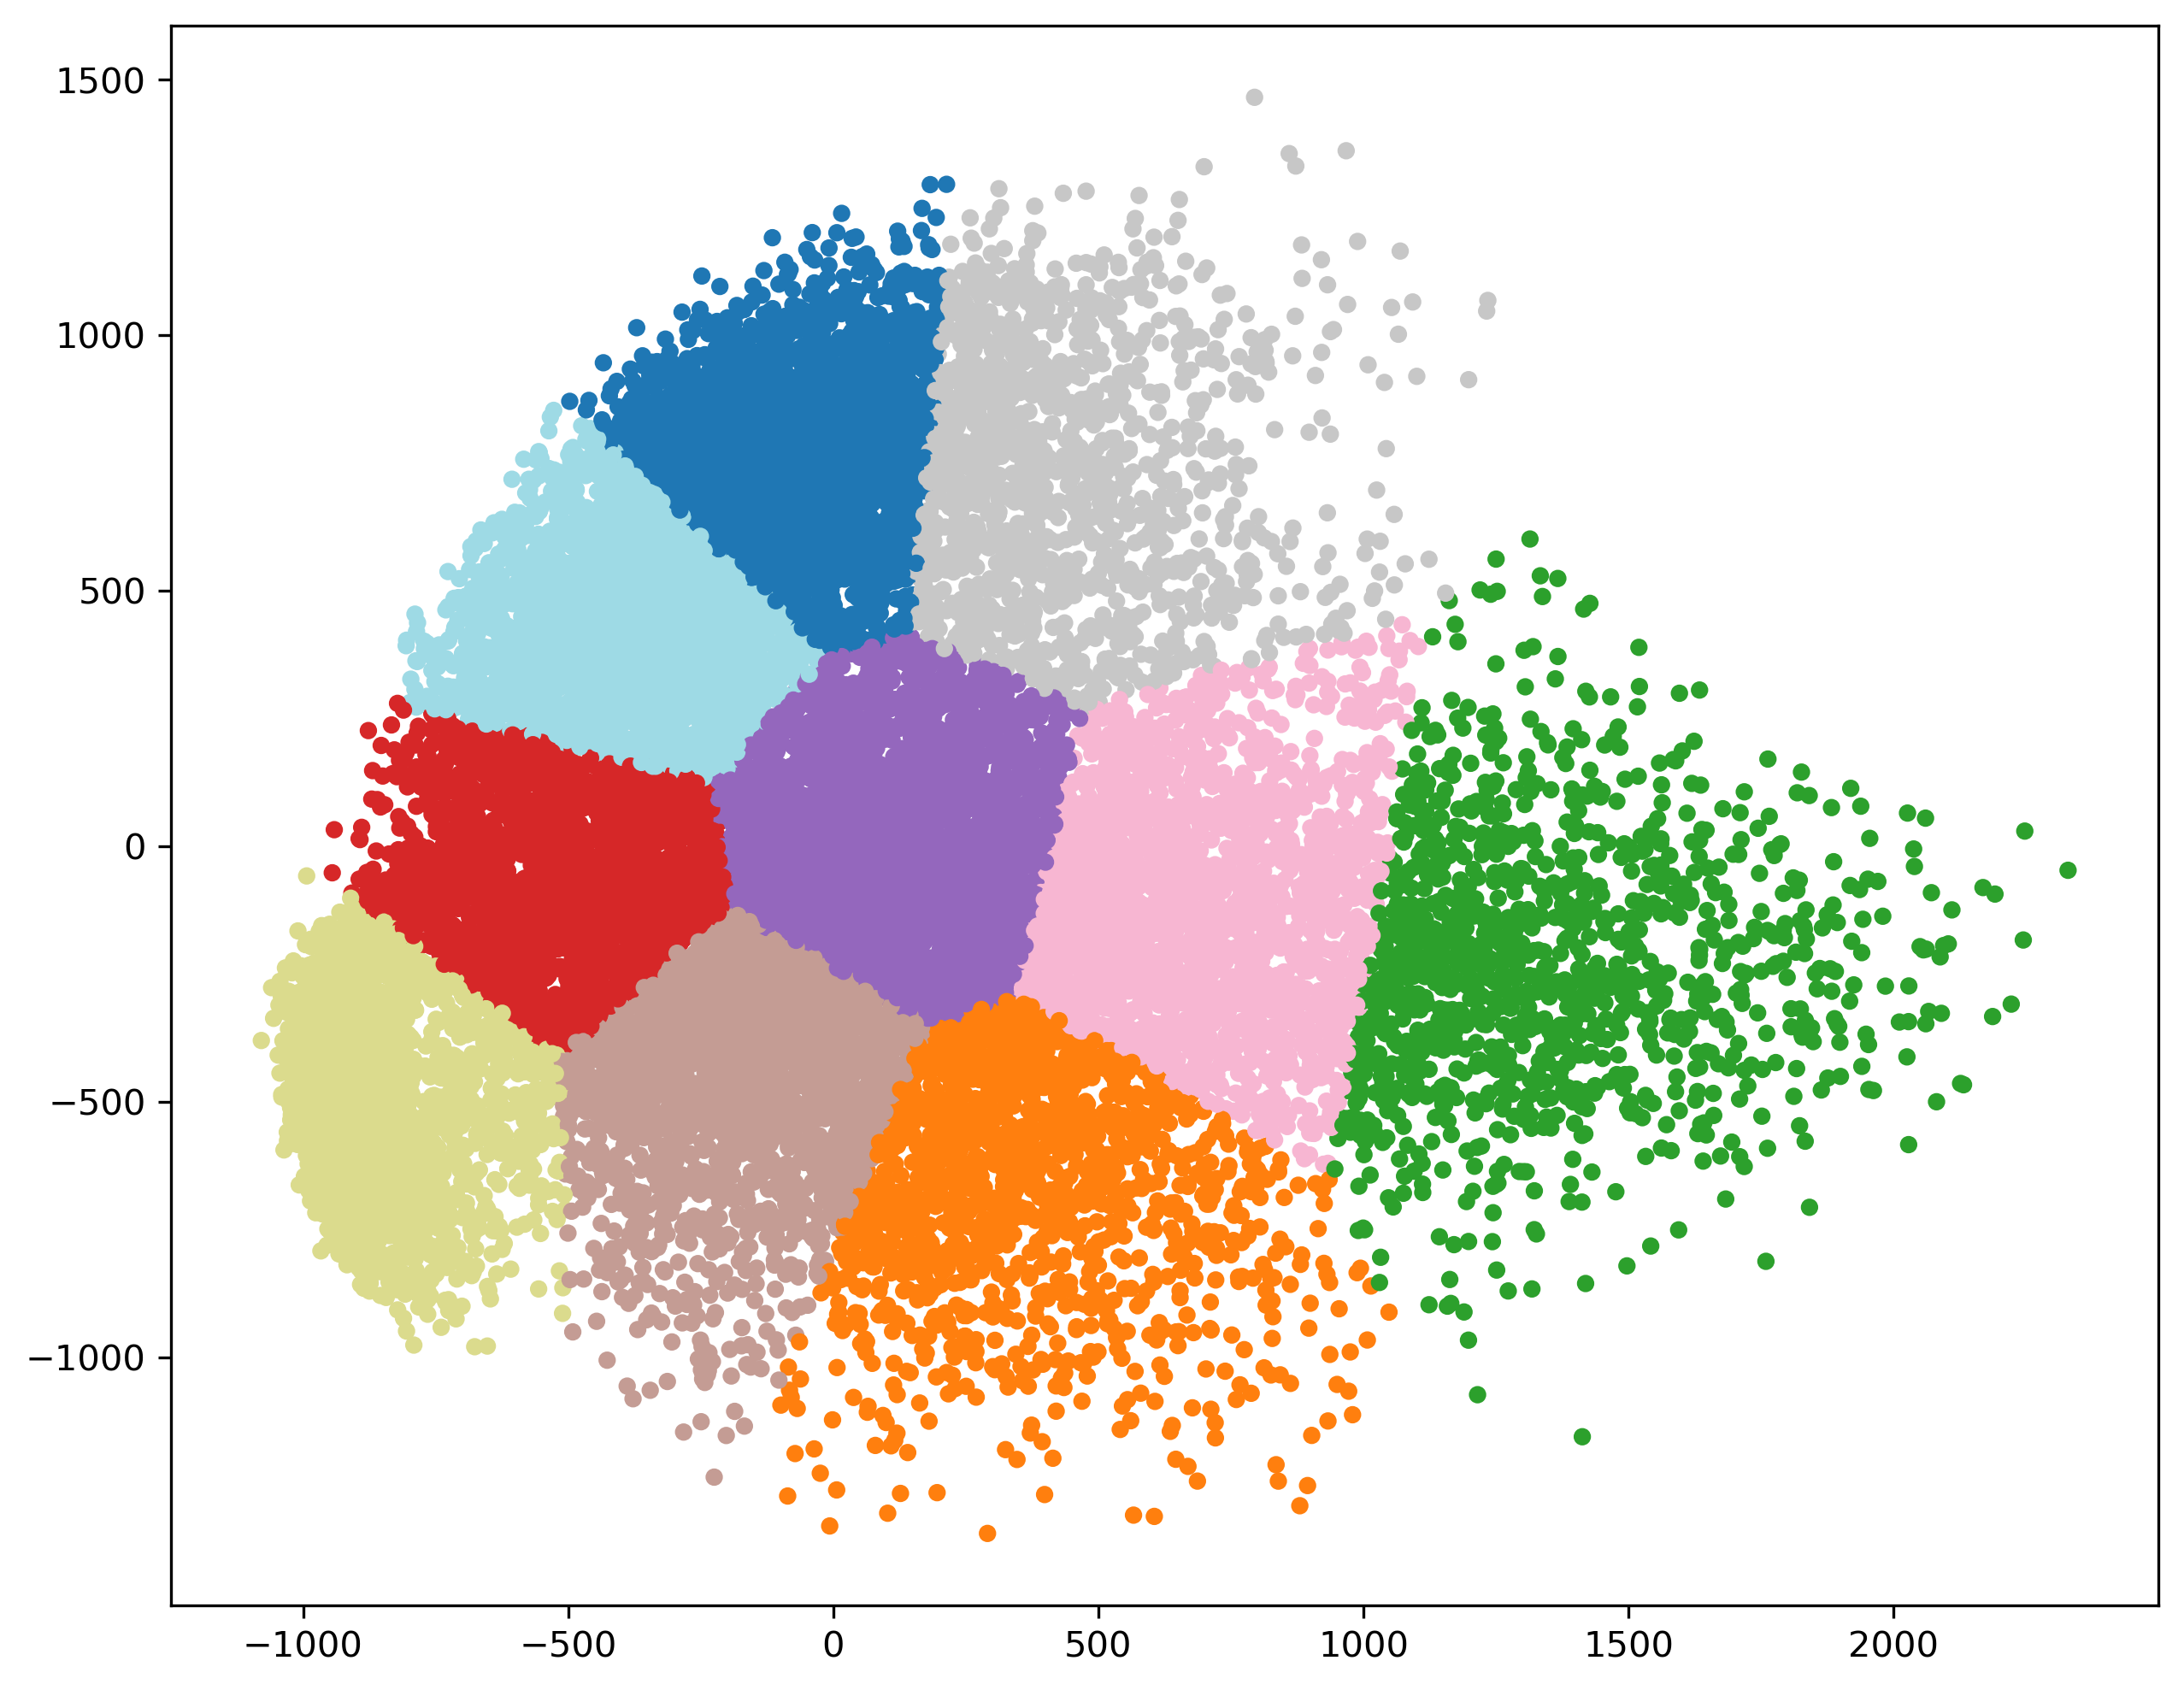

In [110]:
##For 2 PCs:
fig1, ax1 = plt.subplots(1, 1, figsize=(10,8), dpi=300)

N = 20000
scatter = ax1.scatter(X_reduced[:N,0], X_reduced[:N,1], c=km.labels_[:N],
                      s=15, cmap='tab20')


In [125]:
#And train one more classifier:

##CLassifier:
clf_2step = RandomForestClassifier(random_state=42)

clf_2step.fit(kmeans_reduced.labels_.reshape(-1,1), train_labels)


RandomForestClassifier(random_state=42)

In [126]:
#Now predict on the testing data:
######
X_test_reduced = pca.transform(X_test)

#Assign the testing data to clusters:
###
test_cluster = kmeans_reduced.predict(X_test_reduced)

y_pred = clf_2step.predict(test_cluster.reshape(-1,1))

In [127]:
#Not very good, but better than chance
accuracy_score(test_labels, y_pred, normalize=True)

0.4062